In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import numpy as np
import soundfile as sf
import librosa
import IPython.display as ipd
from sklearn.preprocessing import minmax_scale
from glob import glob


In [ ]:
voice_file = 'C:/Users/Toby/Speech_Data/LibriSpeech/train-clean-100/19/198/19-198-0012.flac'
background_file = 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds/BGD_150203_010_CAF.CH1.wav' 

In [ ]:
def mix_audio(voice_file, background_file):
    
    # Load the files
    voice, voice_sr = sf.read(voice_file)
    background, background_sr = sf.read(background_file)

    if voice_sr != background_sr:
        librosa.resample(background, voice_sr)

    # Select a segment of the background track to use
    start_point = np.random.randint(len(background) - len(voice))
    background_segment = background[start_point:start_point+len(voice)]

    # Normalise both sources and mix
    norm_voice = minmax_scale(voice, (-1,1))
    norm_bgs = minmax_scale(background_segment,(-1,1))
    norm_mix = (0.6*norm_voice) + (0.4*norm_bgs)
    
    return norm_mix, voice_sr

In [ ]:
# Copy the file structure

inputpath = 'C:/Users/Toby/Speech_Data/LibriSpeech/'
outputpath = 'C:/Users/Toby/Speech_Data/LibriSpeechMixed/'

for dirpath, dirnames, filenames in os.walk(inputpath):
    structure = os.path.join(outputpath, dirpath[len(inputpath):])
    if not os.path.isdir(structure):
        os.mkdir(structure)
    else:
        print("Folder does already exits!")

In [ ]:
background_file_list = glob('C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/backgrounds/*.wav')
directory = 'C:/Users/Toby/Speech_Data/LibriSpeech/train-clean-100/'
file_list = glob(directory+'/**/*.flac', recursive=True)
count = 0

# Loop over files
for file in file_list:
    # Select a background file
    background_file = background_file_list[np.random.randint(len(background_file_list))]
    # Mix them
    mixture, sample_rate = mix_audio(file, background_file)
    # Save the mixtue
    split_path = file.split('LibriSpeech')
    new_file_path = split_path[0] + 'LibriSpeechMixed' + split_path[1]
    sf.write(new_file_path, mixture, sample_rate)
    count += 1
    if count % 1000 == 0:
        print('{c} files processed.'.format(c=count))


In [ ]:
sf.write('C:/Users/Toby/Speech_Data/LibriSpeechMixed/test.flac', norm_mix, voice_sr)

In [ ]:
norm_mix, voice_sr = mix_audio(voice_file, background_file)

In [ ]:
ipd.Audio(norm_mix, rate=voice_sr)

In [ ]:
file = sf.read('C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/isolated/et05_caf_simu/F05_440C020F_CAF.CH3.wav')

In [ ]:
ipd.Audio(file[0], rate=file[1])

In [ ]:
glob("C:/Users/Toby/Speech_Data/LibriSpeech/dev-clean/**/", recursive=True)

In [2]:
import Dataset
import re
#model_config = {}
#model_config['librispeech_data_root'] = 'C:/Users/Toby/Speech_Data/LibriSpeech'

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
voice_test_dirs = glob(model_config['librispeech_data_root']+'/Voice/test-clean/**/', recursive=True)
mix_test_dirs = glob(model_config['librispeech_data_root'] + '/Mixed/test-clean/**/', recursive=True)
assert len(voice_test_dirs) == len(mix_test_dirs)
libri_speech_data = list()
for i in range(len(voice_test_dirs)):
    libri_speech_data.append(Dataset.zip_files(voice_test_dirs[i], mix_test_dirs[i]))

In [ ]:
voice_test_dirs[2]

In [ ]:
filelist_a = [f for f in os.listdir(voice_test_dirs[2]) if
              os.path.isfile(os.path.join(voice_test_dirs[2], f)) and re.search('CH0', f) is None]
filelist_b = [f for f in os.listdir(mix_test_dirs[2]) if
              os.path.isfile(os.path.join(mix_test_dirs[2], f)) and re.search('CH0', f) is None]

In [ ]:
zipped_list = list()

for file_a in filelist_a:
    for file_b in filelist_b:
        if file_a == file_b:
            zipped_list.append((str(voice_test_dirs[2] + file_a), str(mix_test_dirs[2] + file_b)))
            filelist_b.remove(file_b)
            break
zipped_list = np.array(zipped_list)

In [42]:
model_config = {'saving': True,  # Whether to take checkpoints
                'loading': True,  # Whether to load an existing checkpoint
                'dataset': 'LibriSpeech',  # Choice of 'LibriSpeech', 'CHiME', or 'both'
                'local_run': False,  # Whether experiment is running on laptop or server
                'checkpoint_to_load': "26/26-20",  # Checkpoint format: run/run-epoch
                'INITIALISATION_TEST': False,  # Whether or not to calculate test metrics before training
                'SAMPLE_RATE': 8192,  # Desired sample rate of audio. Input will be resampled to this
                'N_FFT': 512,  # Number of samples in each fourier transform
                'FFT_HOP': 128,  # Number of samples between the start of each fourier transform
                'N_PARALLEL_READERS': 8,
                'PATCH_WINDOW': 256,
                'PATCH_HOP': 128,
                'BATCH_SIZE': 5,
                'N_SHUFFLE': 50,
                'EPOCHS': 20,  # Number of full passes through the dataset to train for
                'EARLY_STOPPING': True,  # Should validation data checks be used for early stopping?
                'VAL_BY_EPOCHS': True,  # Validation at end of each epoch or every 'val_iters'?
                'VAL_ITERS': 2000,  # Number of training iterations between validation checks,
                'NUM_WORSE_VAL_CHECKS': 3,  # Number of successively worse validation checks before early stopping,
                'NORMALISE_MAG': True
                }

if model_config['local_run']:  # Data and Checkpoint directories on my laptop
    model_config['data_root'] = 'C:/Users/Toby/MSc_Project/Test_Audio/GANdatasetsMini/'
    model_config['model_base_dir'] = 'C:/Users/Toby/MSc_Project/MScFinalProjectCheckpoints'
    model_config['log_dir'] = 'logs/local'

else:  # Data and Checkpoint directories on the uni server
    model_config['chime_data_root'] = 'C:/Users/Toby/Speech_Data/CHiME3/data/audio/16kHz/isolated/'
    model_config['librispeech_data_root'] = 'C:/Users/Toby/Speech_Data/LibriSpeech/'
    model_config['model_base_dir'] = '/home/enterprise.internal.city.ac.uk/acvn728/checkpoints'
    model_config['log_dir'] = 'logs/ssh'

In [58]:
voice_test_dirs = glob(model_config['librispeech_data_root']+'/Voice/test-clean/**/', recursive=True)
mix_test_dirs = glob(model_config['librispeech_data_root'] + '/Mixed/test-clean/**/', recursive=True)

test_file_list = np.empty((0, 2))
for i in range(len(voice_test_dirs)):
    test_file_list = np.concatenate((test_file_list, Dataset.zip_files(voice_test_dirs[i], mix_test_dirs[i])), axis=0)

In [57]:
libri_test_data = Dataset.get_paired_dataset(test_file_list,
                                             model_config['SAMPLE_RATE'],
                                             model_config['N_FFT'],
                                             model_config['FFT_HOP'],
                                             model_config['PATCH_WINDOW'],
                                             model_config['PATCH_HOP'],
                                             model_config['N_PARALLEL_READERS'],
                                             model_config['BATCH_SIZE'],
                                             model_config['N_SHUFFLE'],
                                             model_config['NORMALISE_MAG'])

In [43]:
_, _, test_data = Dataset.prepare_datasets(model_config)

In [33]:
import tensorflow as tf
sess = tf.Session()

In [44]:
next_item = test_data.make_one_shot_iterator().get_next()

In [45]:
item = sess.run(next_item)

In [50]:
ipd.Audio(item[2][3,:,:].T, rate=model_config['SAMPLE_RATE'])

In [51]:
ipd.Audio(item[3][3,:,:].T, rate=model_config['SAMPLE_RATE'])

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'hot'

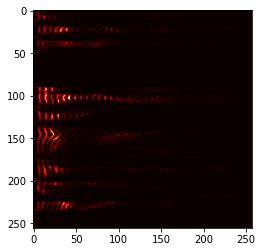

In [52]:
plt.imshow(item[0][4,:,:,0])
plt.show()

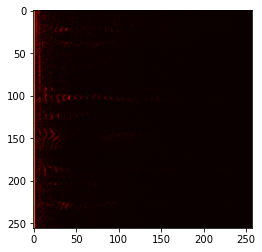

In [53]:
plt.imshow(item[1][4,:,:,0])
plt.show()

In [61]:
def get_paired_dataset(zipped_files,
                       sample_rate,
                       n_fft,
                       fft_hop,
                       patch_window,
                       patch_hop,
                       n_parallel_readers,
                       batch_size,
                       n_shuffle,
                       normalise):

    return (
        tf.data.Dataset.from_tensor_slices((zipped_files[:,0],zipped_files[:,1]))
        .shuffle(1000)
        .map(partial(af.read_audio_pair,
                     sample_rate=sample_rate),
             num_parallel_calls=n_parallel_readers)
        .map(partial(af.compute_spectrogram_map,
                     n_fft=n_fft,
                     fft_hop=fft_hop,
                     normalise=normalise),
             num_parallel_calls=n_parallel_readers)
        .map(partial(af.extract_patches_map,
                     n_fft=n_fft,
                     fft_hop=fft_hop,
                     patch_window=patch_window,
                     patch_hop=patch_hop,),
             num_parallel_calls=n_parallel_readers)
        .flat_map(Utils.zip_tensor_slices).batch(batch_size))

In [66]:
libri_test_data = get_paired_dataset(test_file_list,
                                     model_config['SAMPLE_RATE'],
                                     model_config['N_FFT'],
                                     model_config['FFT_HOP'],
                                     model_config['PATCH_WINDOW'],
                                     model_config['PATCH_HOP'],
                                     model_config['N_PARALLEL_READERS'],
                                     model_config['BATCH_SIZE'],
                                     model_config['N_SHUFFLE'],
                                     model_config['NORMALISE_MAG'])

In [67]:
next_item = test_data.make_one_shot_iterator().get_next()

In [68]:
sess.run(next_item)

(array([[[[ 6.72503083e-04,  0.00000000e+00],
          [ 4.62000025e-03, -1.02535713e+00],
          [ 1.12284375e-02,  1.48654640e+00],
          ...,
          [ 5.58433021e-05,  7.06834435e-01],
          [ 2.06724362e-05, -1.50922120e-01],
          [ 2.33098308e-05,  3.14159274e+00]],
 
         [[ 1.87959876e-02,  0.00000000e+00],
          [ 2.07007602e-02,  1.46813369e+00],
          [ 5.94543340e-03, -2.15767264e+00],
          ...,
          [ 2.43827944e-05,  2.73847818e+00],
          [ 1.92438220e-05,  2.69674957e-01],
          [ 3.19172832e-05,  3.14159274e+00]],
 
         [[ 2.24077236e-02,  0.00000000e+00],
          [ 4.89532687e-02, -2.79960132e+00],
          [ 6.07365593e-02, -4.82019305e-01],
          ...,
          [ 2.34974323e-05,  1.45701540e+00],
          [ 1.41797946e-05, -1.58653557e+00],
          [ 1.47406017e-05,  3.14159274e+00]],
 
         ...,
 
         [[ 3.50451889e-03,  3.14159274e+00],
          [ 1.61538215e-03,  9.79578197e-02],
          

In [65]:
from functools import partial
import numpy as np
import tensorflow as tf
import Audio_functions as af
import Utils

In [8]:
directory_a = 'C:/Users/Toby/Speech_data/CHiME3/data/audio/16kHz/isolated/tr05_bus_simu'

filelist_a = [f for f in os.listdir(directory_a) if
                  os.path.isfile(os.path.join(directory_a, f)) and re.search('CH0', f) is None]

In [7]:
import os, re

In [9]:
filelist_a

['011_011C0203_BUS.CH1.wav',
 '011_011C0203_BUS.CH2.wav',
 '011_011C0203_BUS.CH3.wav',
 '011_011C0203_BUS.CH4.wav',
 '011_011C0203_BUS.CH5.wav',
 '011_011C0203_BUS.CH6.wav',
 '011_011C0206_BUS.CH1.wav',
 '011_011C0206_BUS.CH2.wav',
 '011_011C0206_BUS.CH3.wav',
 '011_011C0206_BUS.CH4.wav',
 '011_011C0206_BUS.CH5.wav',
 '011_011C0206_BUS.CH6.wav',
 '011_011C0209_BUS.CH1.wav',
 '011_011C0209_BUS.CH2.wav',
 '011_011C0209_BUS.CH3.wav',
 '011_011C0209_BUS.CH4.wav',
 '011_011C0209_BUS.CH5.wav',
 '011_011C0209_BUS.CH6.wav',
 '011_011C020K_BUS.CH1.wav',
 '011_011C020K_BUS.CH2.wav',
 '011_011C020K_BUS.CH3.wav',
 '011_011C020K_BUS.CH4.wav',
 '011_011C020K_BUS.CH5.wav',
 '011_011C020K_BUS.CH6.wav',
 '011_011C020M_BUS.CH1.wav',
 '011_011C020M_BUS.CH2.wav',
 '011_011C020M_BUS.CH3.wav',
 '011_011C020M_BUS.CH4.wav',
 '011_011C020M_BUS.CH5.wav',
 '011_011C020M_BUS.CH6.wav',
 '011_011C020O_BUS.CH1.wav',
 '011_011C020O_BUS.CH2.wav',
 '011_011C020O_BUS.CH3.wav',
 '011_011C020O_BUS.CH4.wav',
 '011_011C020O